In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sqlalchemy import create_engine
from sklearn import linear_model
from sklearn.naive_bayes import BernoulliNB
from scipy.stats import bartlett
from scipy.stats import levene
from statsmodels.tsa.stattools import acf
from scipy.stats import jarque_bera
from scipy.stats import normaltest

In [15]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
df = pd.read_sql_query('select * from houseprices',con=engine)

# closing the connection to db
engine.dispose()

In [16]:
df.head(10)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,None,IR1,Lvl,AllPub,...,0,None,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,None,IR1,Lvl,AllPub,...,0,None,None,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,1,2008,WD,Normal,118000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1460 non-null   int64  
 1   mssubclass     1460 non-null   int64  
 2   mszoning       1460 non-null   object 
 3   lotfrontage    1201 non-null   float64
 4   lotarea        1460 non-null   int64  
 5   street         1460 non-null   object 
 6   alley          91 non-null     object 
 7   lotshape       1460 non-null   object 
 8   landcontour    1460 non-null   object 
 9   utilities      1460 non-null   object 
 10  lotconfig      1460 non-null   object 
 11  landslope      1460 non-null   object 
 12  neighborhood   1460 non-null   object 
 13  condition1     1460 non-null   object 
 14  condition2     1460 non-null   object 
 15  bldgtype       1460 non-null   object 
 16  housestyle     1460 non-null   object 
 17  overallqual    1460 non-null   int64  
 18  overallc

In [18]:
df.describe()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Going to isolate out the non continuous columns.

In [19]:
non_cont = df.select_dtypes(['object']).columns
print(non_cont)
print('Number of none continuous columns: {}'.format(len(non_cont)))

Index(['mszoning', 'street', 'alley', 'lotshape', 'landcontour', 'utilities',
       'lotconfig', 'landslope', 'neighborhood', 'condition1', 'condition2',
       'bldgtype', 'housestyle', 'roofstyle', 'roofmatl', 'exterior1st',
       'exterior2nd', 'masvnrtype', 'exterqual', 'extercond', 'foundation',
       'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2',
       'heating', 'heatingqc', 'centralair', 'electrical', 'kitchenqual',
       'functional', 'fireplacequ', 'garagetype', 'garagefinish', 'garagequal',
       'garagecond', 'paveddrive', 'poolqc', 'fence', 'miscfeature',
       'saletype', 'salecondition'],
      dtype='object')
Number of none continuous columns: 43


In [20]:
cont = df.select_dtypes(['int64', 'float64']).columns
print(cont)
print('Number of continuous columns: {}'.format(len(cont)))

Index(['id', 'mssubclass', 'lotfrontage', 'lotarea', 'overallqual',
       'overallcond', 'yearbuilt', 'yearremodadd', 'masvnrarea', 'bsmtfinsf1',
       'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'firstflrsf', 'secondflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'totrmsabvgrd',
       'fireplaces', 'garageyrblt', 'garagecars', 'garagearea', 'wooddecksf',
       'openporchsf', 'enclosedporch', 'threessnporch', 'screenporch',
       'poolarea', 'miscval', 'mosold', 'yrsold', 'saleprice'],
      dtype='object')
Number of continuous columns: 38


A lot of the none continuous columns are not useful in the analysis.  Going to disregard them.
Lets look for missing data.

In [21]:
tmiss = df.isnull().sum().sort_values(ascending=False)
pmiss = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
dmiss = pd.concat([tmiss, pmiss], axis=1, keys=['Total', 'Percent'])
dmiss.head(20)

,Total,Percent
poolqc,1453,0.995205
miscfeature,1406,0.963014
alley,1369,0.937671
fence,1179,0.807534
fireplacequ,690,0.472603
lotfrontage,259,0.177397
garagecond,81,0.055479
garagetype,81,0.055479
garageyrblt,81,0.055479
garagefinish,81,0.055479


Most of the missing is from the none continuous data.  This is consistent as the percentage is raised.

In [22]:
tmiss_non_cont = dmiss.loc[non_cont.values]
tmiss_cont = dmiss.loc[cont.values]
print('Total missing above 10% that are none continuous: {}'.format(len(tmiss_non_cont.loc[tmiss_non_cont['Percent'] >= 0.1])))
print('Total missing above 10% that are continuous: {}'.format(len(tmiss_cont.loc[tmiss_cont['Percent'] >= 0.1])))
print('Total missing above 1% that are none continuous: {}'.format(len(tmiss_non_cont.loc[tmiss_non_cont['Percent'] >= 0.01])))
print('Total missing above 1% that are continuous: {}'.format(len(tmiss_cont.loc[tmiss_cont['Percent'] >= 0.01])))

Total missing above 10% that are none continuous: 5
Total missing above 10% that are continuous: 1
Total missing above 1% that are none continuous: 14
Total missing above 1% that are continuous: 2


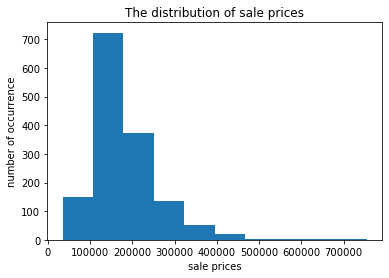

In [23]:
plt.hist(df['saleprice'])
plt.title('The distribution of sale prices')
plt.xlabel('sale prices')
plt.ylabel('number of occurrence')
plt.show()

Here is the correlation of each data point in reference to saleprice.

In [24]:
corr = np.abs(df[cont].iloc[:,1:].corr().loc[:,'saleprice']).sort_values(ascending=False)
corr

saleprice        1.000000
overallqual      0.790982
grlivarea        0.708624
garagecars       0.640409
garagearea       0.623431
totalbsmtsf      0.613581
firstflrsf       0.605852
fullbath         0.560664
totrmsabvgrd     0.533723
yearbuilt        0.522897
yearremodadd     0.507101
garageyrblt      0.486362
masvnrarea       0.477493
fireplaces       0.466929
bsmtfinsf1       0.386420
lotfrontage      0.351799
wooddecksf       0.324413
secondflrsf      0.319334
openporchsf      0.315856
halfbath         0.284108
lotarea          0.263843
bsmtfullbath     0.227122
bsmtunfsf        0.214479
bedroomabvgr     0.168213
kitchenabvgr     0.135907
enclosedporch    0.128578
screenporch      0.111447
poolarea         0.092404
mssubclass       0.084284
overallcond      0.077856
mosold           0.046432
threessnporch    0.044584
yrsold           0.028923
lowqualfinsf     0.025606
miscval          0.021190
bsmthalfbath     0.016844
bsmtfinsf2       0.011378
Name: saleprice, dtype: float64

# Regression Model

Modeling everything that has a correlation of over 50%.

In [25]:
model = sm.OLS(df['saleprice'], sm.add_constant(df[['overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalbsmtsf', 'firstflrsf', 'fullbath', 'totrmsabvgrd', 'yearbuilt', 'yearremodadd']])).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     495.4
Date:                Thu, 19 Mar 2020   Prob (F-statistic):               0.00
Time:                        17:04:10   Log-Likelihood:                -17459.
No. Observations:                1460   AIC:                         3.494e+04
Df Residuals:                    1449   BIC:                         3.500e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.186e+06   1.29e+05     -9.187      0.000   -1.44e+06   -9.33e+05
overallqual    1.96e+04   1190.159     16.472      0.000    1.73e+04    2.19e+04
grlivarea       51.2971      4.233     12.119      0.000      42.994      59.600
garagecars    1.042e+04   3044.272      3.422      0.001    4446.249    1.64e+04
garagearea      14.9475     10.311      1.450      0.147      -5.279      35.174
totalbsmtsf     19.8651      4.295      4.625      0.000      11.439      28.291
firstflrsf      14.1737      4.930      2.875      0.004       4.504      23.844
fullbath     -6790.8715   2682.369     -2.532      0.011   -1.21e+04   -1529.130
totrmsabvgrd    33.1051   1119.061      0.030      0.976   -2162.048    2228.258
yearbuilt      268.2407     50.346      5.328      0.000     169.481     367.000
yearremodadd   296.4812     63.635      4.659      0.000     171.655     421.307
==============================================================================
Omnibus:                      477.814   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58906.279
Skew:                          -0.412   Prob(JB):                         0.00
Kurtosis:                      34.107   Cond. No.                     4.69e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.69e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### OLS

In [26]:
lrm = linear_model.LinearRegression()
lrm.fit(df[['overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalbsmtsf', 'firstflrsf', 'fullbath', 'totrmsabvgrd', 'yearbuilt', 'yearremodadd']], df['saleprice'])
print('\nCoefficients: {}\nIntercept: {}'.format(lrm.coef_, lrm.intercept_))


Coefficients: [ 1.96045898e+04  5.12971178e+01  1.04179010e+04  1.49475334e+01
  1.98650991e+01  1.41737355e+01 -6.79087146e+03  3.31050771e+01
  2.68240707e+02  2.96481161e+02]
Intercept: -1186193.766666143


### Linearity

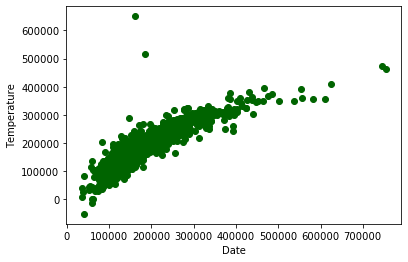

In [27]:
predictions = lrm.predict(df[['overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalbsmtsf', 'firstflrsf', 'fullbath', 'totrmsabvgrd', 'yearbuilt', 'yearremodadd']])

plt.scatter(df['saleprice'], predictions, color='DarkGreen')
#plt.plot(df['date'], df['temperature'])
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()

### Error

In [28]:
errors = df['saleprice'] - predictions
print('Mean of errors is: {}'.format(np.mean(errors)))

Mean of errors is: -7.048708527055505e-11


### Homoscedasticity

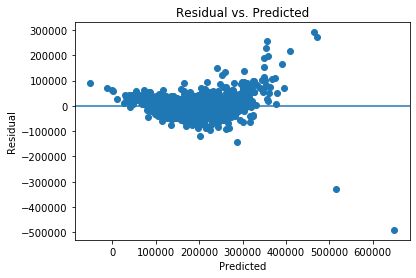

In [29]:
plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [30]:
bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print('Bartlett test statistic value is {0:3g} and p value is {1:.3g}'.format(bart_stats[0], bart_stats[1]))
print('Levene test statistic value is {0:3g} and p value is {1:.3g}'.format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 519.442 and p value is 5.6e-115
Levene test statistic value is 525.361 and p value is 4.77e-107


The p values being so low on each test is a good indicator that the erro variance is not consistent across observations.

### Multicollinearity

The data is multicollinear, as the p value is very low in both the bartlett and levene tests.

### Uncorrelated Error

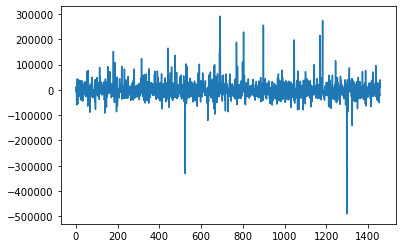

In [52]:
plt.plot(errors)
plt.show()

c:\program files\python38\lib\site-packages\statsmodels\tsa\stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


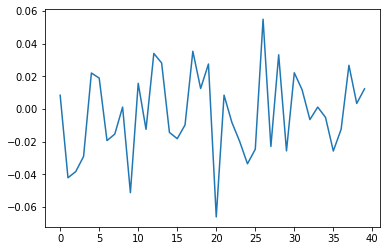

In [53]:
acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

The autocorrelation between errors is very low, between -0.06 and 0.06.

### Correlated Errors

The coefficient of errors are not normally distributed.  The explanatory variables and errors are not independent.  More advanced techniques need to be applied in order for this model to reflect anything significant.

### Normality of Errors

In [55]:
jb_stats = jarque_bera(errors)
norm_stats = normaltest(errors)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 58906.27914183737 and p value is 0.0
Normality test statistics is 477.81361609355497 and p value is 1.7542503674329946e-104


This errors are normaly distributed and the null hypothesis can be rejected.